In [ ]:
import matplotlib
matplotlib.__version__

'3.9.2'

In [ ]:
import numpy as np

In [ ]:
"""
Perceptron Classifier

This module implements a Perceptron classifier using Python, based on the
algorithm described in the book *"Machine Learning with PyTorch and Scikit-Learn"*
by Sebastian Raschka.

Workflow:
1. fit(X, y) --> Initializes weights, bias, and starts the training loop (n_iter)
2. For each epoch:
3. For each (xi, target) in zip(X, y):
4. self.predict(xi) --> Calls net_input(xi) --> Returns net input
5. np.where(net_input(xi) >= 0, 1, 0) --> Returns predicted class (1 or 0)
6. In fit(), calculate error (update) and update weights and bias.
7. Track misclassifications in errors_.

Author:
    Code adapted from *Machine Learning with PyTorch and Scikit-Learn* book
"""

class Perceptron:
  """Perceptron Classifier

  Parameters
  ------------
  eta : float
    Learning rate (between 0.0 and 1.0)
  n_iter : int
    Passes over the training dataset
  random_state : int
    Random number generator seed for random weight
    initialization

  Attributes
  ------------
  w_ : 1d-array
    weights after fitting
  b_ : Scalar
    Bias unit after fitting

  errors_ : list
    Number of misclassifications (updates) in each epoch.

  """
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """Fit training data. Performs the training process.

    Parameters
    -----------
    X : {array-like}, shape = [n_examples, n_features]
      Training vectors, where n_examples is the number of
      examples and n_features is the number of features
    y : array-like, shape = [n_examples]
      Target values.

    Returns
    ---------
    self : object

    """
    # Create a random number generator with a specified seed
    rgen = np.random.RandomState(self.random_state)
    # Initialize a weight vector and bias with random values on normal distribution
    self.w_ = rgen.normal(loc=0.0, scale=0.01,
                          size=X.shape[1])
    self.b_ = np.float_(0.)
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_ += update * xi
        self.b_ += update
        # Calculate the number of misclassifications
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    """Calculate net input
    X : i-th example row from matrix X
    """
    return np.dot(X, self.w_) + self.b_

  def predict(self, X):
    """Return class label after unit step (Step Function Threshold)
    X: i-th example row from matrix X
    """
    return np.where(self.net_input(X) >= 0.0, 1, 0)




In [ ]:
# Import Data from UCI Machine Learning Repository into a DataFrame
import pandas as pd
import sklearn
from sklearn.datasets import load_iris

In [ ]:
# Load the iris dataset and extract into features and target arrays
iris = load_iris()
iris_features = iris.data
iris_target = iris.target

In [ ]:
# Construct a dataframe
df = pd.DataFrame(data=iris_features)

df[4] = iris_target

In [ ]:
# Display the dataframe
df.head(100)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [ ]:
# Another way to get the iris dataset
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/'
    'machine-learning-databases/iris/iris.data',
    header=None,
    encoding='utf-8'
)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# Extract the first 100 class labels
# They correspond to Iris-Setosa (Class 1) and Iris-Versicolor (Class 0)
# Extract them into a target vector y
# Extract 100 training examples of first and second feature columns (sepal and petal lengths)
# Assign them to feature matrix X which can be visualized as 2d scatterplot


y = df.iloc[0:100, 4].values                #.values takes the pd series to a numpy array
y = np.where(y == "Iris-setosa", 0, 1)
X = df.iloc[0:100, [0, 2]].values

In [ ]:
# Import matplotlib visualization
import matplotlib.pyplot as plt

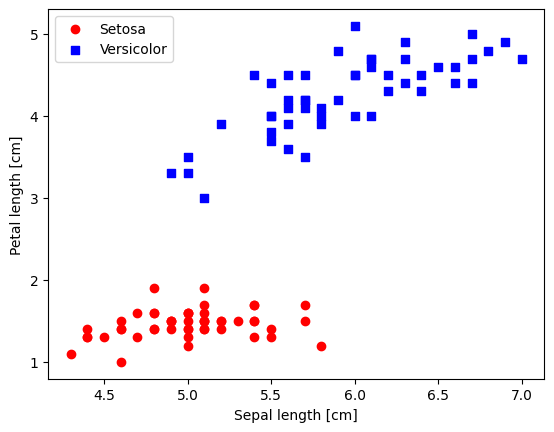

In [ ]:
# Visualization
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

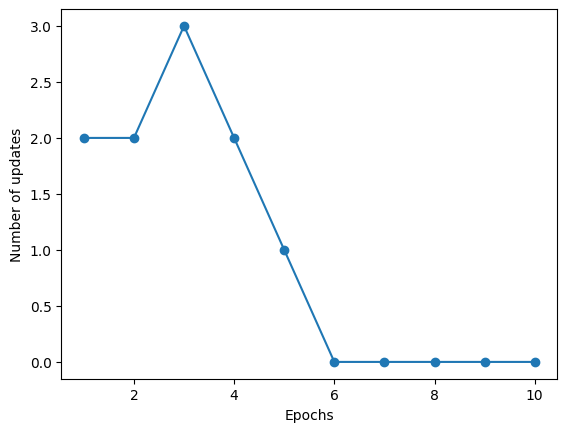

In [ ]:
# Train the perceptron on this dataset X, y
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_)+1),
         ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [ ]:
# Implement a function to visualize decision boundaries for 2d datasets
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, classifier, resolution=0.02):
  # Set up market generator and color map
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contour(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class {cl}',
                edgecolor='black')


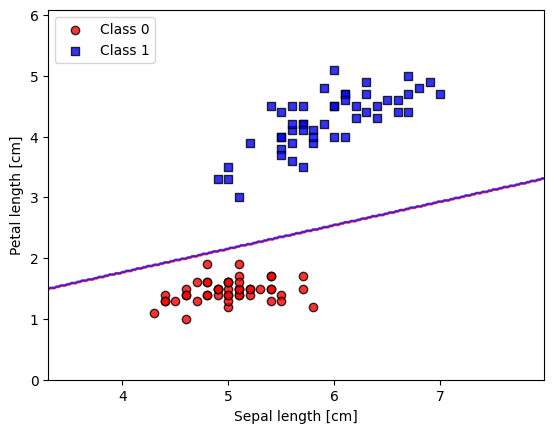

In [ ]:
plot_decision_boundary(X, y, ppn, resolution=0.02)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Important thing to ask is if two classes can be separated by a linear decision boundary
# If not, the weights will never stop updating unless we set a max epoch
